In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy
from os.path import join
import numpy as np

In [2]:
datadir = "core1 2 3-20190201T183913Z-001/core1 2 3"

In [3]:
from scipy.io import loadmat


def read_core_data(core):
    if core not in range(1,4):
        print( "core number is out of range" )
        raise IndexError
    rho = loadmat(join(datadir, 'rho{}.mat'.format(core) ))['cl']
    bi = loadmat(join(datadir, 'bi{}.mat'.format(core) ))['bi']
    bj = loadmat(join(datadir, 'bj{}.mat'.format(core) ))['bj']
    bk = loadmat(join(datadir, 'bk{}.mat'.format(core) ))['bk']
    
    return rho, bi,bj,bk
    

In [4]:
def calculate_cos2_gamma( blos, bmag):
    """gamma is the B-field w.r.t. plane of sky"""
    return 1.0 - (blos/bmag)**2.0

def calculate_phi( bnorth, bsouth ):
    """phi is plane of sky b-field angle"""
    return numpy.arctan(bsouth/bnorth)

def calculate_stokes_parameters( rho, bi,bj,bk ):
    
    bmag = (bi**2 + bj**2 + bk**2)**0.5

    # for line of sight along i th direction
    # NOTE: HERE I assume that the actual indexing is given by 
    # [ k, j , i ]!!!!
    cos2_gamma = calculate_cos2_gamma( bi, bmag )
    phi = calculate_phi( bk, bj )
    q_i = np.sum( rho*np.cos(2.0*phi) * cos2_gamma, axis=2)
    u_i = np.sum( rho*np.sin(2.0*phi) * cos2_gamma, axis=2)
    
    sigma_i = np.sum(rho,axis=2)
    sigma2_i = np.sum(rho * (cos2_gamma/2.0 -1./3.) ,axis=2)

    # for line of sight along j th direction
    cos2_gamma = calculate_cos2_gamma( bj, bmag )
    phi = calculate_phi( bk, bi )
    q_j = np.sum( rho*np.cos(2.0*phi) * cos2_gamma, axis=1)
    u_j = np.sum( rho*np.sin(2.0*phi) * cos2_gamma, axis=1)
    
    sigma_j = np.sum(rho,axis=1)
    sigma2_j = np.sum(rho * (cos2_gamma/2.0 -1./3.) ,axis=1)

    # for line of sight along k th direction
    cos2_gamma = calculate_cos2_gamma( bk, bmag )
    phi = calculate_phi( bj, bi )
    q_k = np.sum( rho*np.cos(2.0*phi) * cos2_gamma, axis=0)
    u_k = np.sum( rho*np.sin(2.0*phi) * cos2_gamma, axis=0)
    
    sigma_k = np.sum(rho,axis=0)
    sigma2_k = np.sum(rho * (cos2_gamma/2.0 -1./3.) ,axis=0)    
    
    
    return [ [q_i,u_i, sigma_i, sigma2_i],
             [q_j,u_j, sigma_j, sigma2_j],
             [q_k,u_k, sigma_k, sigma2_k] ]

def convert_stokes_to_vectors( q, u, sigma, sigma2, p0 = 0.15, spacing = 10 ):
    
    theta = 0.5* np.arctan(u/q)
    P = p0 * (np.sqrt(q*q + u*u)) / (sigma - p0*sigma2)
    
    return P, theta

import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)


def create_plots( Q, U, Sigma, Sigma2, p0=0.15, spacing = 10 ):
    P, theta = convert_stokes_to_vectors( Q, U, Sigma, Sigma2, p0 = 0.15 )
    ly, lx = P.shape
    X, Y = np.mgrid[0:lx, 0:ly]
    
    from matplotlib.colors import LogNorm
    fsizex, fsizey = plt.rcParams.get('figure.figsize')
    
    f, ax = plt.subplots( figsize=( fsizex*2, 2*fsizex/lx*ly ) )
    cs = ax.imshow( Sigma, origin='lower', norm=LogNorm() )
    ax.quiver( X[::spacing,::spacing], Y[::spacing,::spacing], 
               (P*np.sin(theta))[::spacing,::spacing], (P*np.cos(theta))[::spacing,::spacing], color='w' ) 
    add_colorbar(cs)
#     cbar.ax.minorticks_off()
    plt.show()
    
    f, ax = plt.subplots( nrows=1, ncols=2, figsize=( 2*fsizey*2, 2*fsizey ) )
    ax[0].loglog( Sigma.flatten(), P.flatten(), ls = '', marker ='.' )
    hb = ax[1].hexbin( Sigma.flatten(), P.flatten(), xscale='log',yscale='log', bins='log', mincnt = 1 )
    cbar = f.colorbar(cs)
    ax[0].set_xlabel('Column Density')
    ax[0].set_ylabel('Polarization Fraction')
    plt.tight_layout()

In [5]:
rho1,bi1,bj1,bk1 = read_core_data(1)
los_i, los_j, los_k = calculate_stokes_parameters( rho1, bi1,bj1,bk1 )

line of sight along x axis


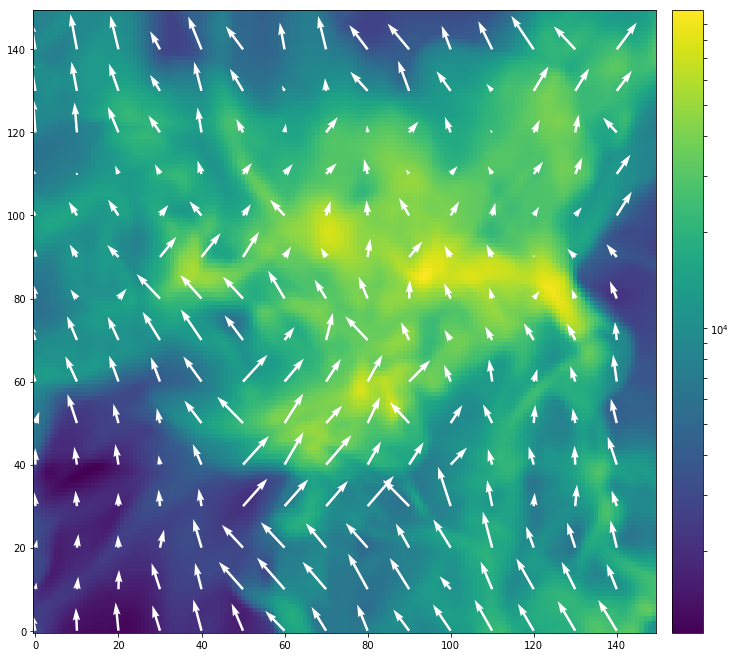

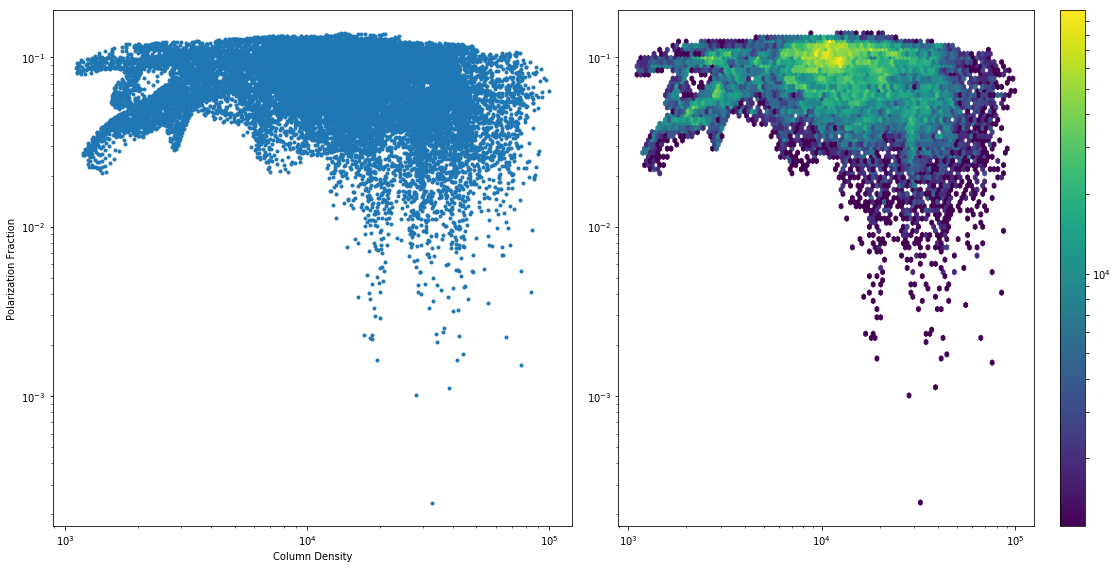

In [6]:
print("line of sight along x axis")
create_plots( *los_i, p0=0.15, spacing=10 )

line of sight along y axis


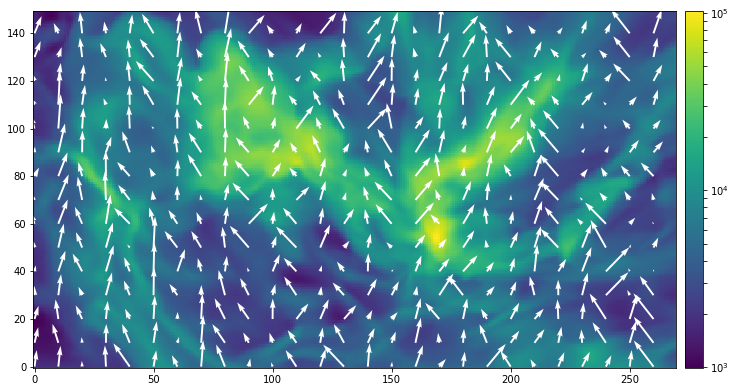

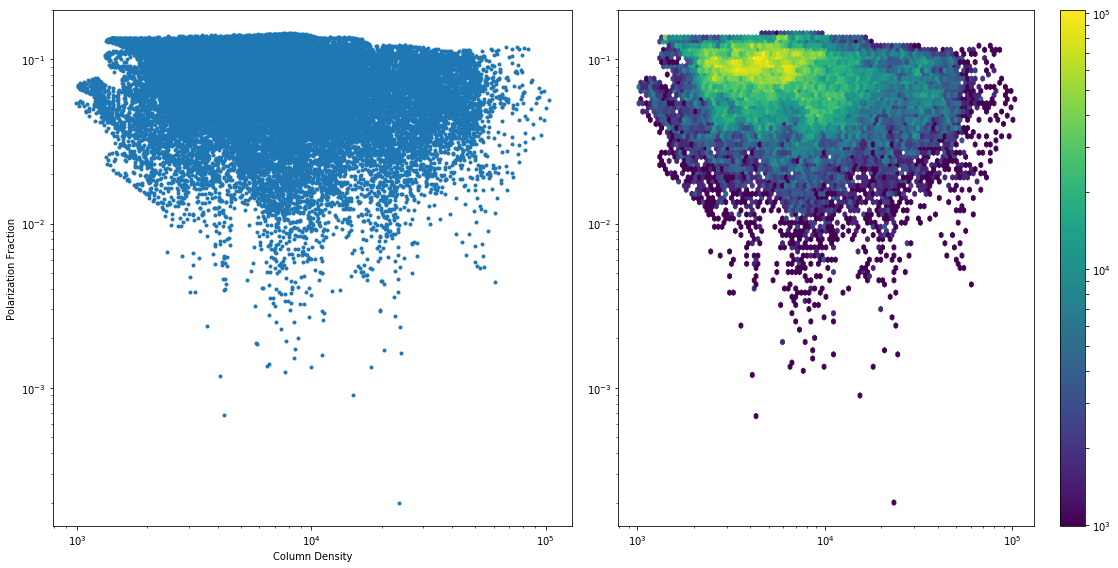

In [7]:
print("line of sight along y axis")
create_plots( *los_j, p0=0.15, spacing=10 )

line of sight along z axis


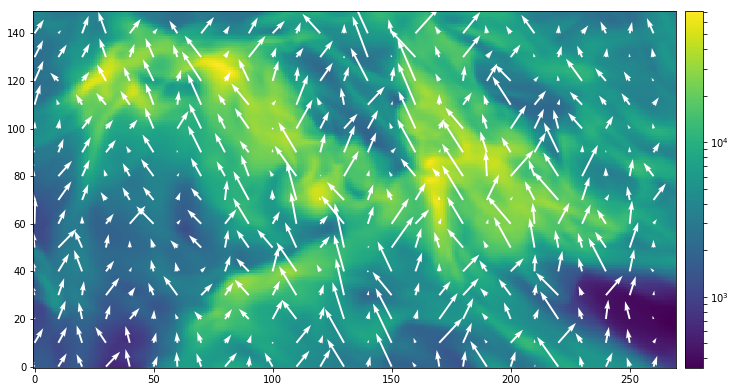

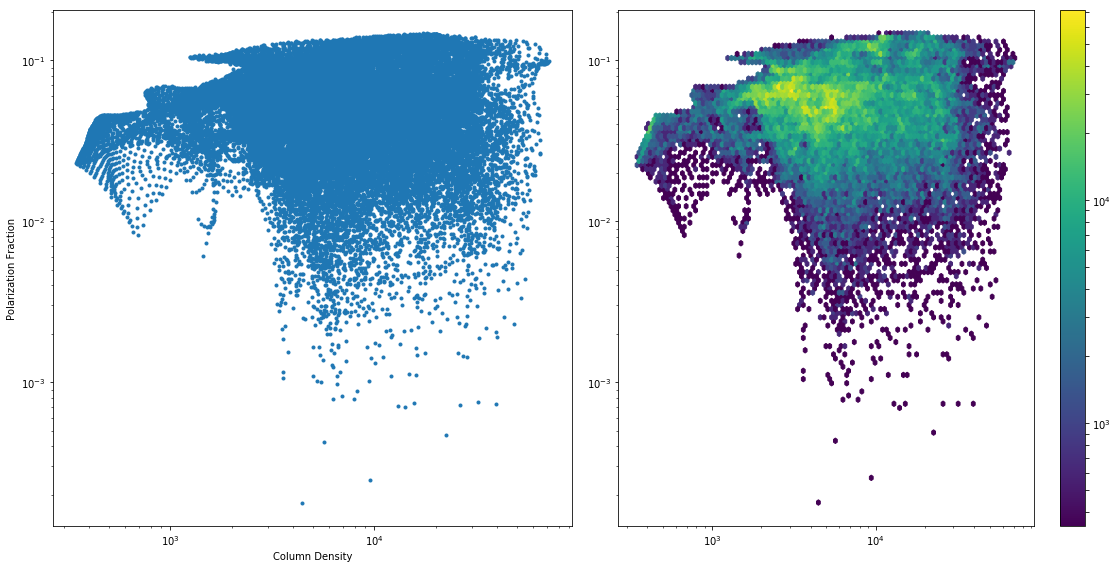

In [8]:
print("line of sight along z axis")
create_plots( *los_k, p0=0.15, spacing=10 )

In [9]:
rho1,bi1,bj1,bk1 = read_core_data(2)
los_i, los_j, los_k = calculate_stokes_parameters( rho1, bi1,bj1,bk1 )

line of sight along x axis


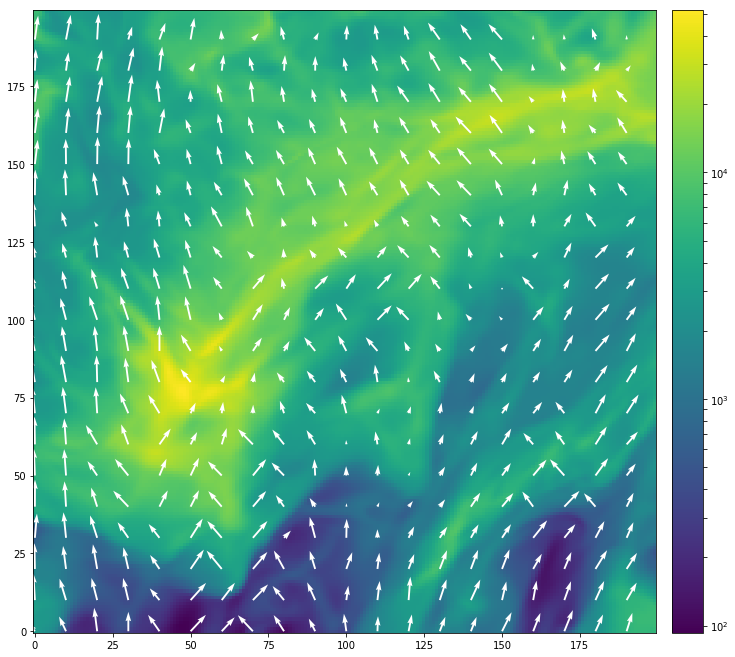

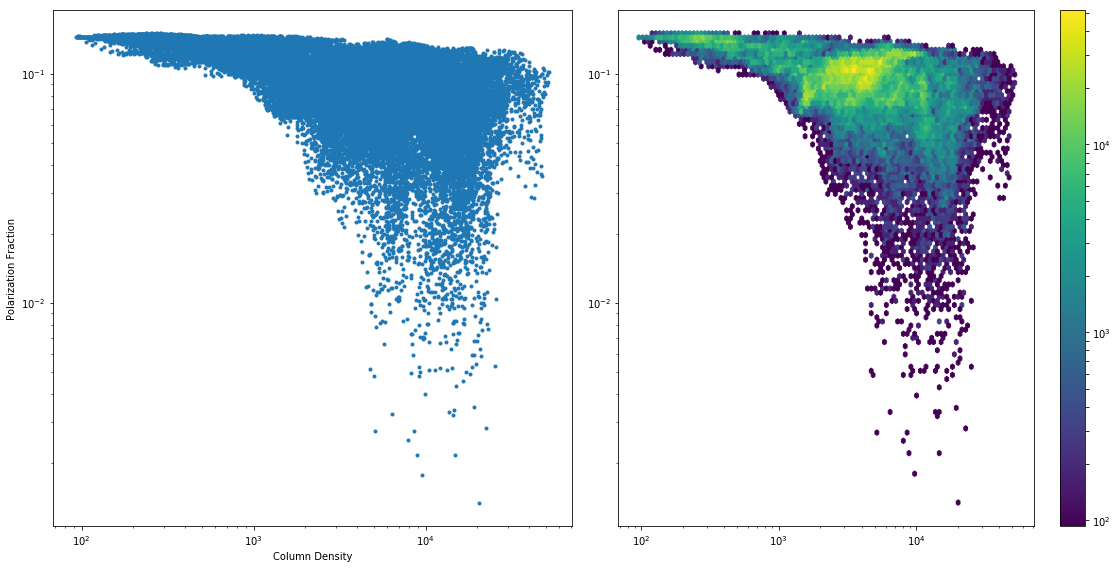

In [10]:
print("line of sight along x axis")
create_plots( *los_i, p0=0.15, spacing=10 )

line of sight along y axis


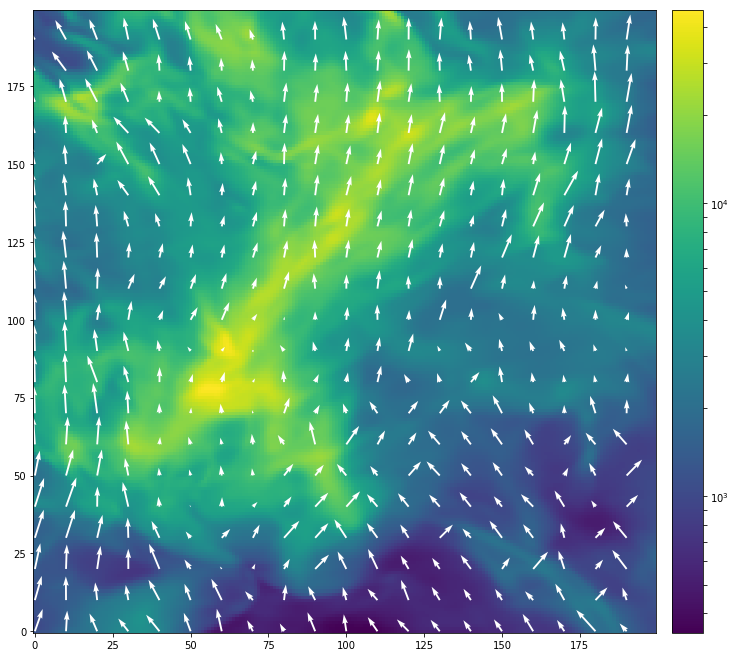

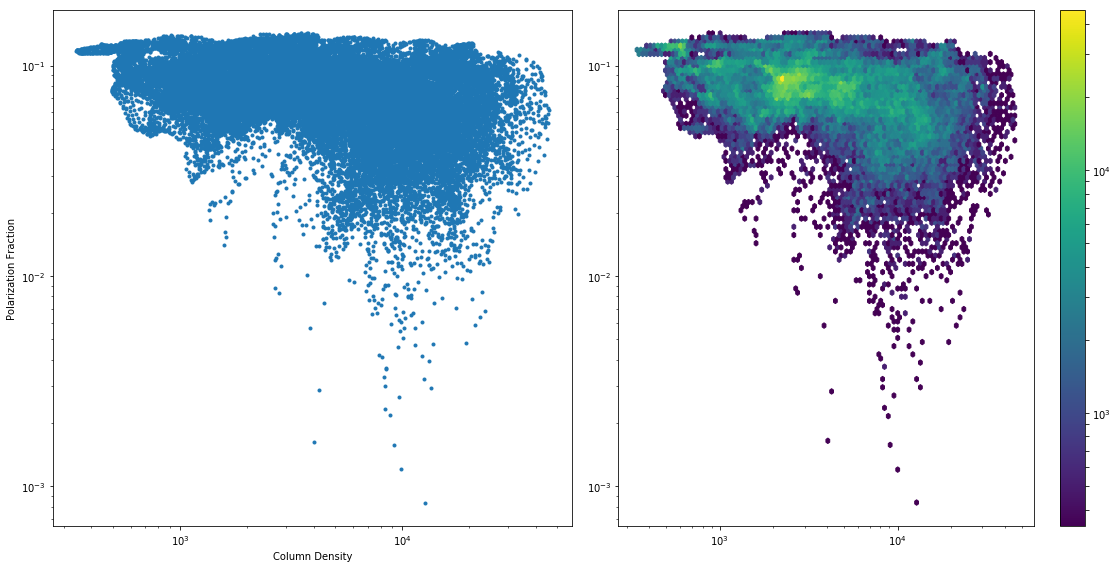

In [11]:
print("line of sight along y axis")
create_plots( *los_j, p0=0.15, spacing=10 )

line of sight along z axis


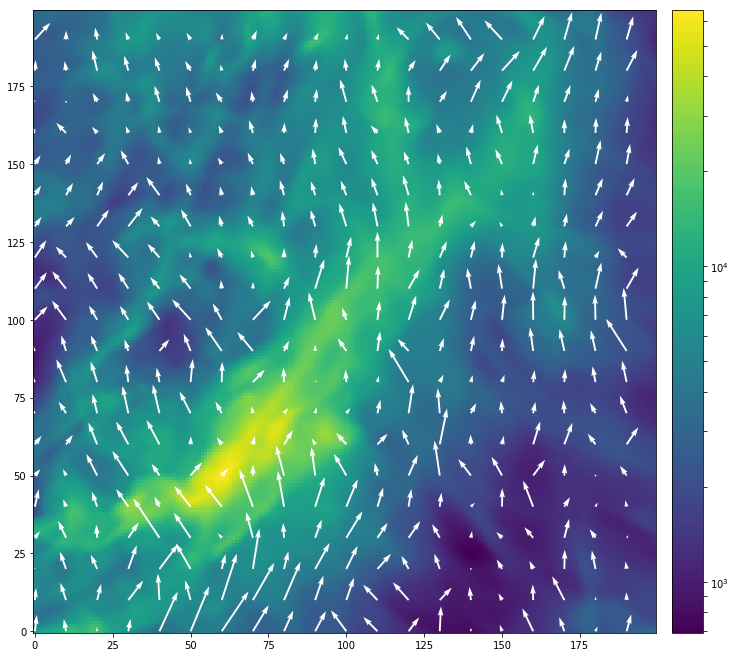

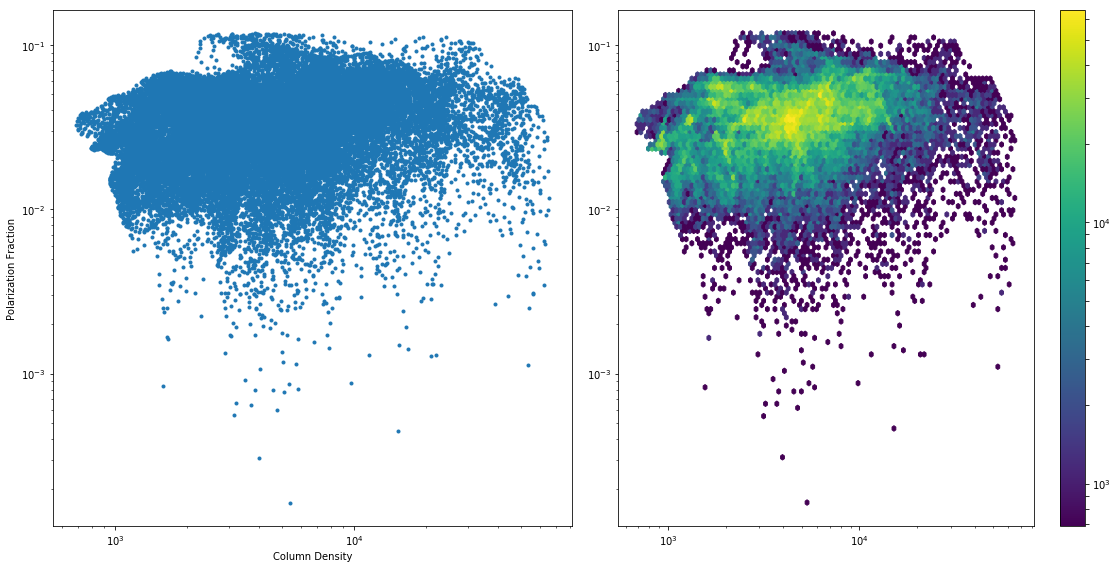

In [12]:
print("line of sight along z axis")
create_plots( *los_k, p0=0.15, spacing=10 )

In [13]:
rho1,bi1,bj1,bk1 = read_core_data(3)
los_i, los_j, los_k = calculate_stokes_parameters( rho1, bi1,bj1,bk1 )

line of sight along x axis


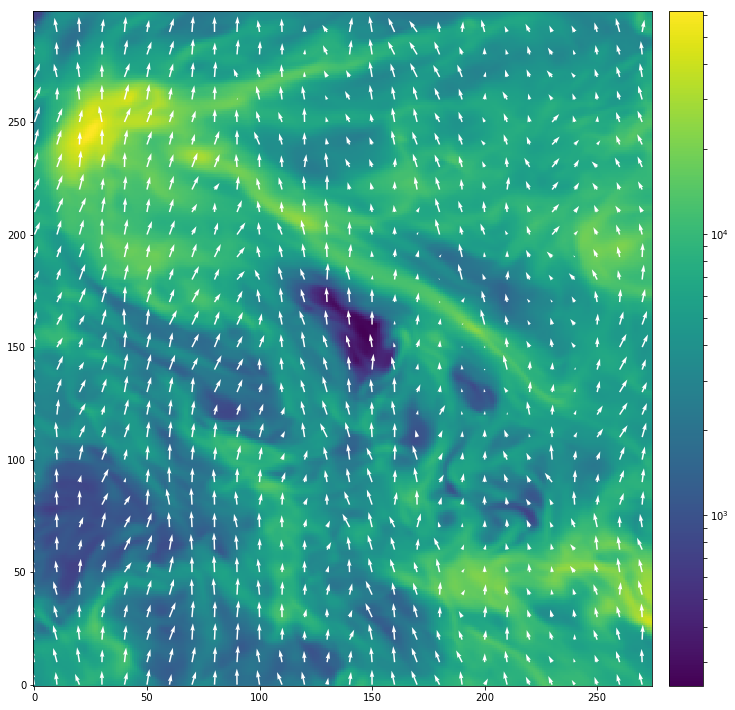

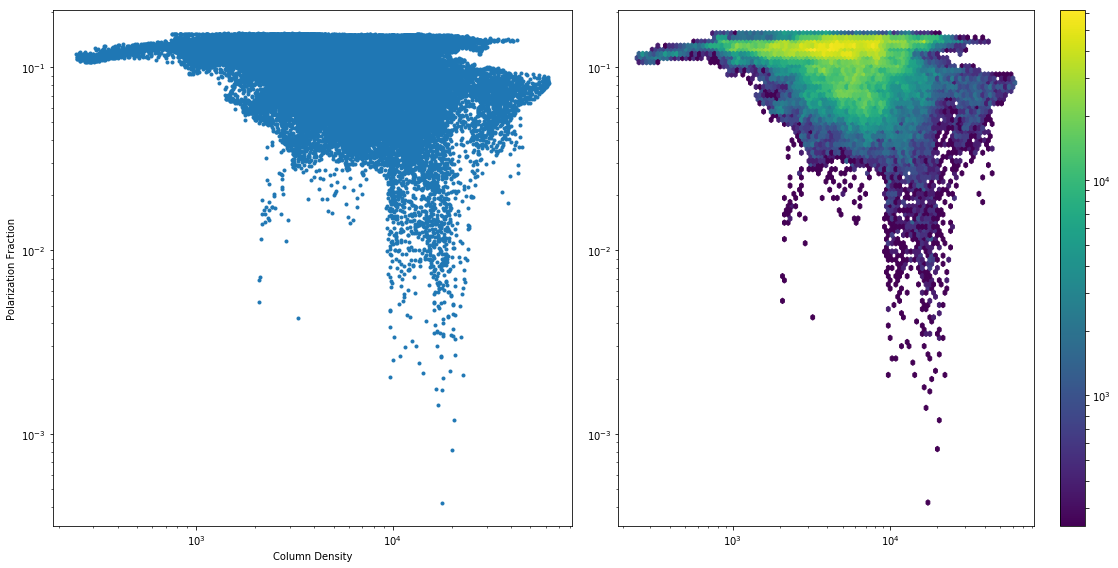

In [14]:
print("line of sight along x axis")
create_plots( *los_i, p0=0.15, spacing=10 )

line of sight along y axis


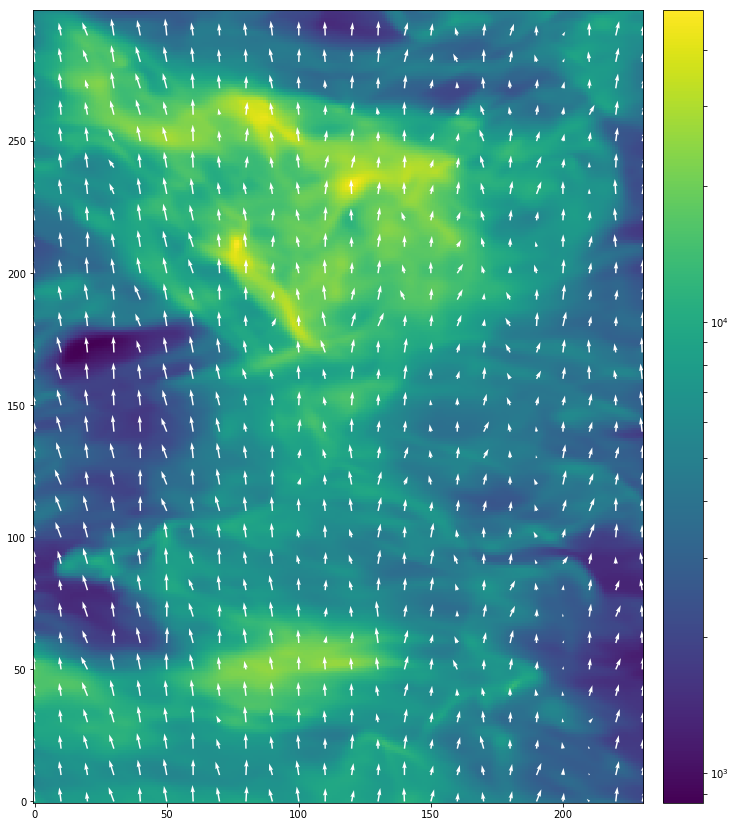

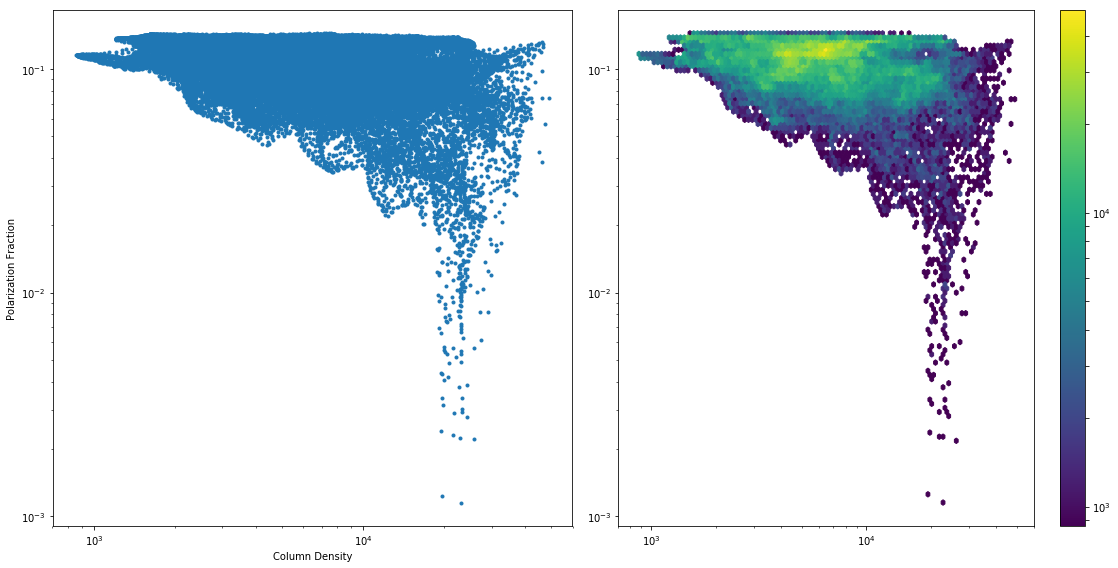

In [15]:
print("line of sight along y axis")
create_plots( *los_j, p0=0.15, spacing=10 )

line of sight along z axis


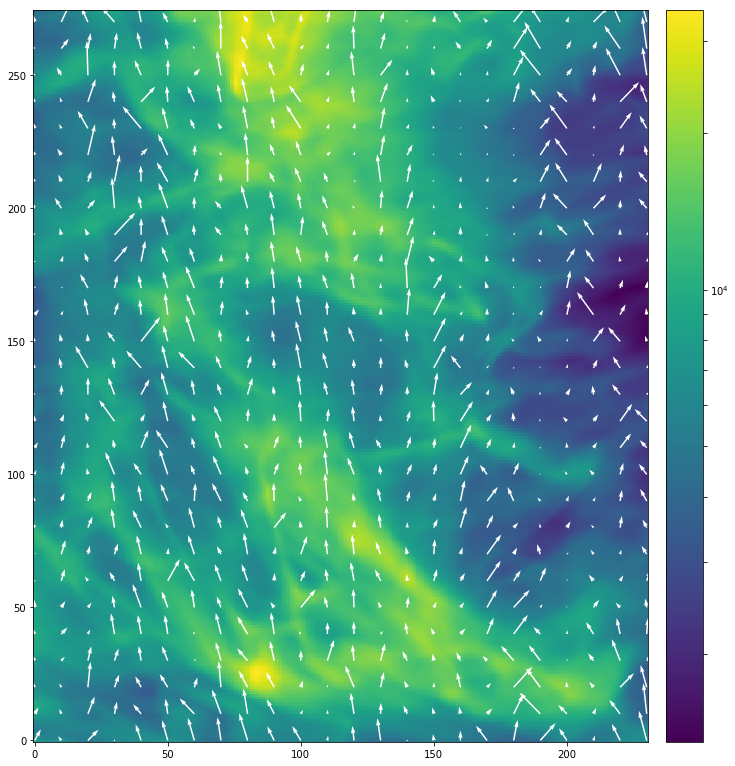

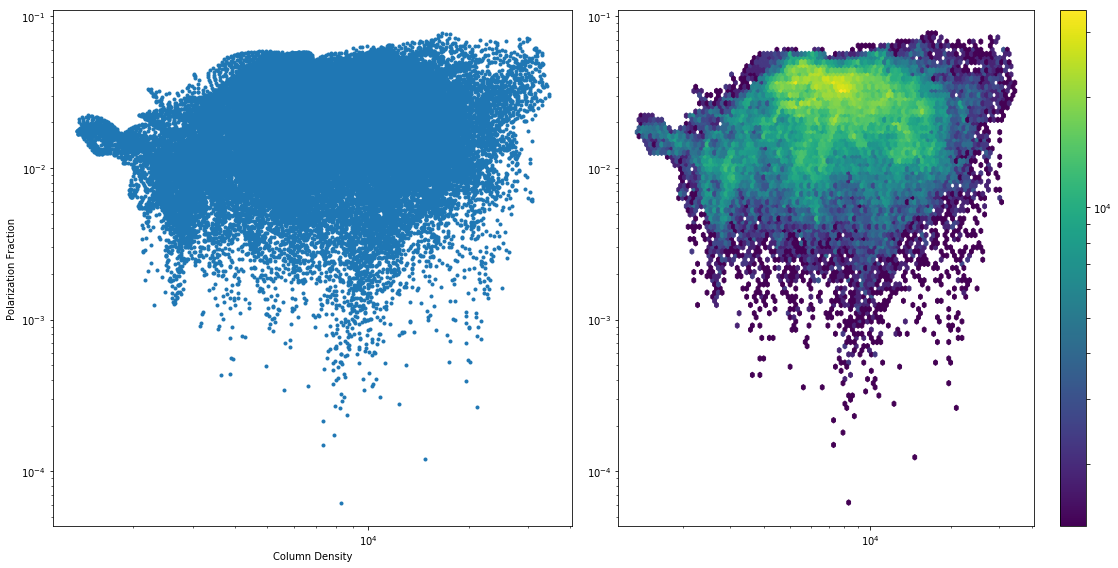

In [16]:
print("line of sight along z axis")
create_plots( *los_k, p0=0.15, spacing=10 )